In [ ]:
from google.colab import drive
drive.mount('/content/drive')
raw_data_dir = img_dir = "/content/drive/MyDrive/Classes/Fall 2024/Quant Bio/Methods in Quant Bio - Final Project/data_notebooks/archive"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import os
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from matplotlib.cm import viridis
from sklearn.decomposition import PCA

#import warnings
#warnings.filterwarnings('ignore')

In [ ]:
csv_files = [f for f in os.listdir(raw_data_dir) if f.endswith('.csv')]

combined_df = pd.concat([pd.read_csv(os.path.join(raw_data_dir, file)) for file in csv_files], ignore_index=True)

combined_df.head()

<ipython-input-6-9169481d7235>:3: DtypeWarning: Columns (40) have mixed types. Specify dtype option on import or set low_memory=False.
  combined_df = pd.concat([pd.read_csv(os.path.join(raw_data_dir, file)) for file in csv_files], ignore_index=True)
<ipython-input-6-9169481d7235>:3: DtypeWarning: Columns (40) have mixed types. Specify dtype option on import or set low_memory=False.
  combined_df = pd.concat([pd.read_csv(os.path.join(raw_data_dir, file)) for file in csv_files], ignore_index=True)
<ipython-input-6-9169481d7235>:3: DtypeWarning: Columns (40) have mixed types. Specify dtype option on import or set low_memory=False.
  combined_df = pd.concat([pd.read_csv(os.path.join(raw_data_dir, file)) for file in csv_files], ignore_index=True)
<ipython-input-6-9169481d7235>:3: DtypeWarning: Columns (40) have mixed types. Specify dtype option on import or set low_memory=False.
  combined_df = pd.concat([pd.read_csv(os.path.join(raw_data_dir, file)) for file in csv_files], ignore_index=Tr

,TimeStamp,Delta_TP9,Delta_AF7,Delta_AF8,Delta_TP10,Theta_TP9,Theta_AF7,Theta_AF8,Theta_TP10,Alpha_TP9,...,Gyro_X,Gyro_Y,Gyro_Z,HeadBandOn,HSI_TP9,HSI_AF7,HSI_AF8,HSI_TP10,Battery,Elements
0,2024-06-02 09:47:17.286,0.367629,0.273846,0.314092,0.65451,0.671255,0.038836,0.253804,0.719206,1.390953,...,-0.246735,-3.274841,0.568237,1.0,1.0,1.0,1.0,1.0,75.0,NaN
1,2024-06-02 09:47:17.287,0.367629,0.273846,0.314092,0.65451,0.671255,0.038836,0.253804,0.719206,1.390953,...,-0.246735,-3.274841,0.568237,1.0,1.0,1.0,1.0,1.0,75.0,NaN
2,2024-06-02 09:47:17.288,0.367629,0.273846,0.314092,0.65451,0.671255,0.038836,0.253804,0.719206,1.390953,...,-0.246735,-3.274841,0.568237,1.0,1.0,1.0,1.0,1.0,75.0,NaN
3,2024-06-02 09:47:17.288,0.367629,0.273846,0.314092,0.65451,0.671255,0.038836,0.253804,0.719206,1.390953,...,-0.246735,-3.274841,0.568237,1.0,1.0,1.0,1.0,1.0,75.0,NaN
4,2024-06-02 09:47:17.289,0.367629,0.273846,0.314092,0.65451,0.671255,0.038836,0.253804,0.719206,1.390953,...,-0.246735,-3.274841,0.568237,1.0,1.0,1.0,1.0,1.0,75.0,NaN


In [ ]:
#Calculate the percentage of rows with non-missing 'Elements'
non_missing_percentage = combined_df['Elements'].notnull().sum() / len(combined_df) * 100
print(f"Percentage of rows with non-missing 'Elements': {non_missing_percentage:.2f}%")

Percentage of rows with non-missing 'Elements': 0.05%


In [ ]:
missing_percentage = combined_df.isnull().sum() / len(combined_df) * 100

missing_percentage

,0
TimeStamp,0.000000
Delta_TP9,0.054650
Delta_AF7,0.054650
Delta_AF8,0.054650
Delta_TP10,0.054650
Theta_TP9,0.054650
Theta_AF7,0.054650
Theta_AF8,0.054650
Theta_TP10,0.054650
Alpha_TP9,0.054650


In [ ]:
if 'Elements' in combined_df.columns:
    combined_df.drop(columns=['Elements'], inplace=True)

In [ ]:
###remove NAs and rows that have more than 10% of their info missing
missing_percentage = combined_df.isnull().sum() / len(combined_df) * 100

columns_to_drop_na = missing_percentage[missing_percentage < 10].index
combined_df = combined_df.dropna(subset=columns_to_drop_na)

columns_to_fill_median = missing_percentage[missing_percentage >= 10].index
for column in columns_to_fill_median:
    median_value = combined_df[column].median()
    combined_df[column].fillna(median_value, inplace=True)

remaining_missing = combined_df.isnull().sum().sum()

if remaining_missing > 0:
    print("Columns with remaining missing values after processing:\n", combined_df.isnull().sum())

combined_df = combined_df.replace([float('inf'), float('-inf')], pd.NA)
combined_df = combined_df.dropna()

combined_df.head()

<ipython-input-9-162d2b0f6f2f>:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  combined_df[column].fillna(median_value, inplace=True)


In [ ]:
combined_df.columns

Index(['TimeStamp', 'Delta_TP9', 'Delta_AF7', 'Delta_AF8', 'Delta_TP10',
       'Theta_TP9', 'Theta_AF7', 'Theta_AF8', 'Theta_TP10', 'Alpha_TP9',
       'Alpha_AF7', 'Alpha_AF8', 'Alpha_TP10', 'Beta_TP9', 'Beta_AF7',
       'Beta_AF8', 'Beta_TP10', 'Gamma_TP9', 'Gamma_AF7', 'Gamma_AF8',
       'Gamma_TP10', 'RAW_TP9', 'RAW_AF7', 'RAW_AF8', 'RAW_TP10', 'AUX_RIGHT',
       'Mellow', 'Concentration', 'Accelerometer_X', 'Accelerometer_Y',
       'Accelerometer_Z', 'Gyro_X', 'Gyro_Y', 'Gyro_Z', 'HeadBandOn',
       'HSI_TP9', 'HSI_AF7', 'HSI_AF8', 'HSI_TP10', 'Battery'],
      dtype='object')

In [ ]:
#Calculate sampling frequency from timestamps
combined_df['TimeStamp'] = pd.to_datetime(combined_df['TimeStamp'])
time_diffs = combined_df['TimeStamp'].diff().dt.total_seconds()
fs = 1 / time_diffs.mean()
print(f"Calculated Sampling Frequency: {fs} Hz")

Calculated Sampling Frequency: 7.733532056624771 Hz


In [ ]:
bands = {
    'Delta': ['Delta_TP9', 'Delta_AF7', 'Delta_AF8', 'Delta_TP10'],
    'Theta': ['Theta_TP9', 'Theta_AF7', 'Theta_AF8', 'Theta_TP10'],
    'Alpha': ['Alpha_TP9', 'Alpha_AF7', 'Alpha_AF8', 'Alpha_TP10'],
    'Beta': ['Beta_TP9', 'Beta_AF7', 'Beta_AF8', 'Beta_TP10'],
    'Gamma': ['Gamma_TP9', 'Gamma_AF7', 'Gamma_AF8', 'Gamma_TP10']
}

pca_results = {}

for band, columns in bands.items():
    standardized_data = (combined_df[columns] - combined_df[columns].mean()) / combined_df[columns].std()

    #Fit PCA
    pca = PCA(n_components=1)
    pca_results[band] = pca.fit_transform(standardized_data)

    combined_df[f'{band}_PCA'] = pca_results[band]

    #Calculate the median for each band
    combined_df[f'{band}_Median'] = combined_df[columns].median(axis=1)

    print(f"{band} PCA Explained Variance Ratio: {pca.explained_variance_ratio_[0]:.2%}")

print(combined_df[[f'{band}_PCA' for band in bands.keys()] + [f'{band}_Median' for band in bands.keys()]].head())


Delta PCA Explained Variance Ratio: 73.20%
Theta PCA Explained Variance Ratio: 67.70%
Alpha PCA Explained Variance Ratio: 67.68%
Beta PCA Explained Variance Ratio: 70.71%
Gamma PCA Explained Variance Ratio: 63.75%
   Delta_PCA  Theta_PCA  Alpha_PCA  Beta_PCA  Gamma_PCA Delta_Median  \
0  -0.535707  -1.100514   -1.61249  4.059653   4.834012     0.509775   
1  -0.535707  -1.100514   -1.61249  4.059653   4.834012     0.509775   
2  -0.535707  -1.100514   -1.61249  4.059653   4.834012     0.509775   
3  -0.535707  -1.100514   -1.61249  4.059653   4.834012     0.509775   
4  -0.535707  -1.100514   -1.61249  4.059653   4.834012     0.509775   

  Theta_Median Alpha_Median Beta_Median Gamma_Median  
0     0.302849     0.363222    0.949131     0.722248  
1     0.302849     0.363222    0.949131     0.722248  
2     0.302849     0.363222    0.949131     0.722248  
3     0.302849     0.363222    0.949131     0.722248  
4     0.302849     0.363222    0.949131     0.722248  


In [ ]:
csv_path = "/content/drive/MyDrive/Classes/Fall 2024/Quant Bio/Methods in Quant Bio - Final Project/data_notebooks/20241127_brainwaves.csv"

combined_df.to_csv(csv_path, index=False)

## Below - With processed csv

In [ ]:
neuro_df = pd.read_csv("/content/drive/MyDrive/Classes/Fall 2024/Quant Bio/Methods in Quant Bio - Final Project/data_notebooks/20241127_brainwaves.csv")

In [ ]:
neuro_df.head()

,TimeStamp,Delta_TP9,Delta_AF7,Delta_AF8,Delta_TP10,Theta_TP9,Theta_AF7,Theta_AF8,Theta_TP10,Alpha_TP9,...,Delta_PCA,Theta_PCA,Alpha_PCA,Beta_PCA,Gamma_PCA,Delta_Median,Theta_Median,Alpha_Median,Beta_Median,Gamma_Median
0,2024-06-13 14:10:20.376,0.01898,0.901503,0.509348,0.5102,0.24,-0.579461,0.365699,0.380469,0.580544,...,-0.535707,-1.100514,-1.61249,4.059653,4.834012,0.509775,0.302849,0.363222,0.949131,0.722248
1,2024-06-13 14:10:20.378,0.01898,0.901503,0.509348,0.5102,0.24,-0.579461,0.365699,0.380469,0.580544,...,-0.535707,-1.100514,-1.61249,4.059653,4.834012,0.509775,0.302849,0.363222,0.949131,0.722248
2,2024-06-13 14:10:20.378,0.01898,0.901503,0.509348,0.5102,0.24,-0.579461,0.365699,0.380469,0.580544,...,-0.535707,-1.100514,-1.61249,4.059653,4.834012,0.509775,0.302849,0.363222,0.949131,0.722248
3,2024-06-13 14:10:20.378,0.01898,0.901503,0.509348,0.5102,0.24,-0.579461,0.365699,0.380469,0.580544,...,-0.535707,-1.100514,-1.61249,4.059653,4.834012,0.509775,0.302849,0.363222,0.949131,0.722248
4,2024-06-13 14:10:20.379,0.01898,0.901503,0.509348,0.5102,0.24,-0.579461,0.365699,0.380469,0.580544,...,-0.535707,-1.100514,-1.61249,4.059653,4.834012,0.509775,0.302849,0.363222,0.949131,0.722248


In [ ]:
neuro_df.columns

Index(['TimeStamp', 'Delta_TP9', 'Delta_AF7', 'Delta_AF8', 'Delta_TP10',
       'Theta_TP9', 'Theta_AF7', 'Theta_AF8', 'Theta_TP10', 'Alpha_TP9',
       'Alpha_AF7', 'Alpha_AF8', 'Alpha_TP10', 'Beta_TP9', 'Beta_AF7',
       'Beta_AF8', 'Beta_TP10', 'Gamma_TP9', 'Gamma_AF7', 'Gamma_AF8',
       'Gamma_TP10', 'RAW_TP9', 'RAW_AF7', 'RAW_AF8', 'RAW_TP10', 'AUX_RIGHT',
       'Mellow', 'Concentration', 'Accelerometer_X', 'Accelerometer_Y',
       'Accelerometer_Z', 'Gyro_X', 'Gyro_Y', 'Gyro_Z', 'HeadBandOn',
       'HSI_TP9', 'HSI_AF7', 'HSI_AF8', 'HSI_TP10', 'Battery', 'Delta_PCA',
       'Theta_PCA', 'Alpha_PCA', 'Beta_PCA', 'Gamma_PCA', 'Delta_Median',
       'Theta_Median', 'Alpha_Median', 'Beta_Median', 'Gamma_Median'],
      dtype='object')

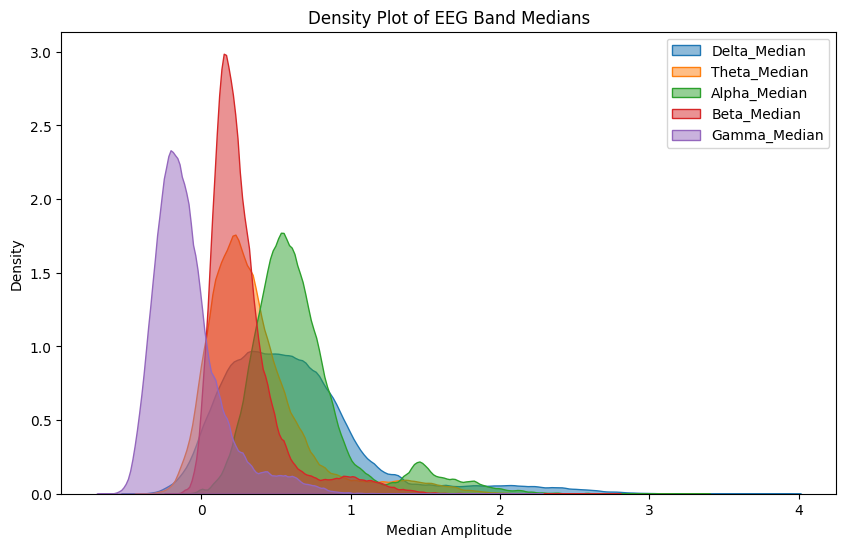

In [ ]:
# KDE plot for EEG band medians
plt.figure(figsize=(10, 6))
for band in ['Delta_Median', 'Theta_Median', 'Alpha_Median', 'Beta_Median', 'Gamma_Median']:
    sns.kdeplot(neuro_df[band], label=band, fill=True, alpha=0.5)

plt.title('Density Plot of EEG Band Medians')
plt.xlabel('Median Amplitude')
plt.ylabel('Density')
plt.legend()
#plt.grid()
plt.show()

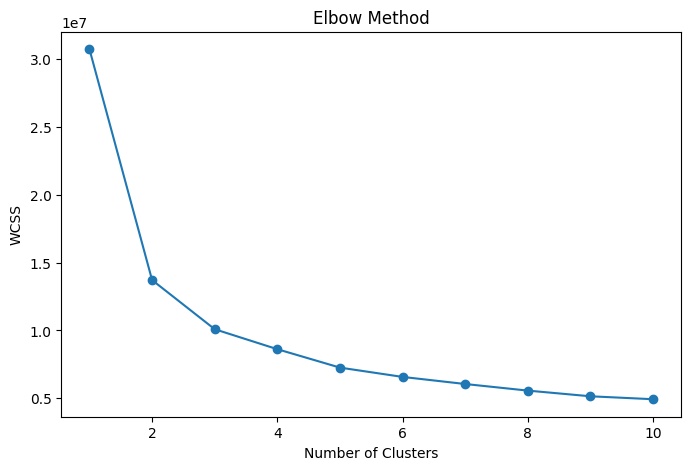

In [ ]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_data)  # Use your scaled PCA data here
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()


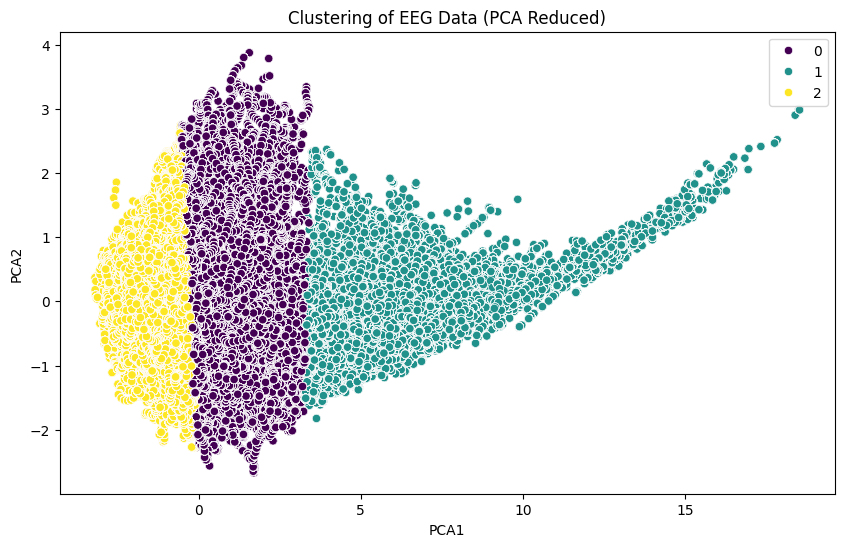

In [ ]:
# Visualize clusters in 2D using PCA
features = ['Delta_Median', 'Theta_Median', 'Alpha_Median', 'Beta_Median', 'Gamma_Median']
data = neuro_df[features]

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

kmeans = KMeans(n_clusters=3, random_state=42)
neuro_df['Cluster'] = kmeans.fit_predict(scaled_data)

pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)
neuro_df['PCA1'] = pca_result[:, 0]
neuro_df['PCA2'] = pca_result[:, 1]

plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=neuro_df, palette='viridis')
plt.title('Clustering of EEG Data (PCA Reduced)')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend()
#plt.grid()
plt.show()

In [ ]:
#Explore Cluster Characteristics: Investigate the EEG band medians within each cluster:
cluster_means = neuro_df.groupby('Cluster')[features].mean()
print(cluster_means)

         Delta_Median  Theta_Median  Alpha_Median  Beta_Median  Gamma_Median
Cluster                                                                     
0            2.038463      1.365115      1.698016     1.005439      0.486112
1            0.374630      0.185709      0.508970     0.154704     -0.220452
2            0.739371      0.452234      0.741192     0.344882     -0.008743


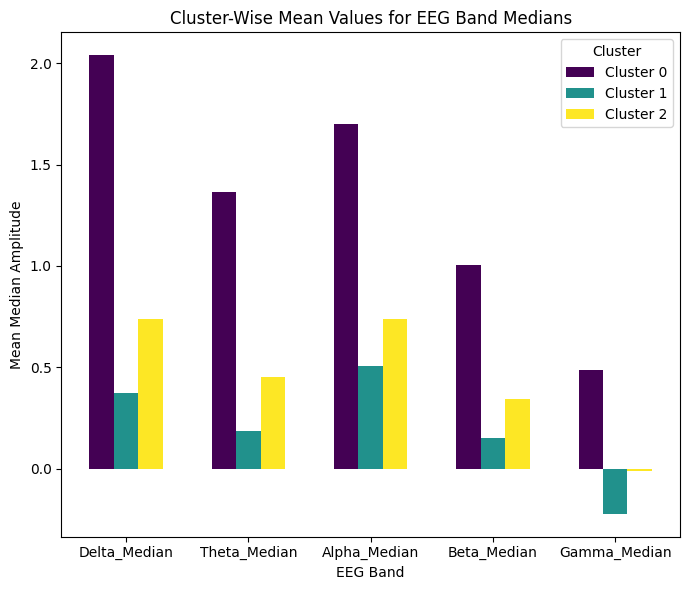

In [ ]:
cluster_means_transposed = cluster_means.T

x = np.arange(len(cluster_means_transposed.index))
width = 0.2

colors = viridis(np.linspace(0, 1, len(cluster_means_transposed.columns)))

fig, ax = plt.subplots(figsize=(7, 6))
for i, cluster in enumerate(cluster_means_transposed.columns):
    ax.bar(
        x + i * width,
        cluster_means_transposed[cluster],
        width,
        label=f'Cluster {cluster}',
        color=colors[i]
    )

ax.set_title('Cluster-Wise Mean Values for EEG Band Medians')
ax.set_xlabel('EEG Band')
ax.set_ylabel('Mean Median Amplitude')
ax.set_xticks(x + width * (len(cluster_means_transposed.columns) - 1) / 2)
ax.set_xticklabels(cluster_means_transposed.index)
ax.legend(title='Cluster')

plt.tight_layout()

plt.show()
